In [1]:
import numpy as np

In [2]:
#UNTUK NILAI IMPOR
class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputLayerSize = 5
        self.outputLayerSize = 1
        self.hiddenLayerSize = 8

        #weights
        self.W1 = np.random.randn(self.inputLayerSize,\
                                 self.hiddenLayerSize)  
        self.W2 = np.random.randn(self.hiddenLayerSize,\
                                 self.outputLayerSize)  
    
    def printw(self):
        return self.W1
        
    def weight(self, W1, W2):
        #Make an internal variable for the weight:
        self.W1 = W1
        self.W2 = W2
        
    def forward(self, X):
        #forward propagation through our network
        self.z2 = np.dot(X,self.W1)  
        self.a2 = self.tanh(self.z2)  # activation function
        self.z3 = np.dot(self.a2, self.W2) 
        yHat = self.tanh(self.z3)  # final activation function
        return yHat

    def tanh(self, z):
        # activation function
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z): 
        #derivative of tanh
        return 1-((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))**2
    
    def costFunction(self,X,y):
        self.yHat = self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self,X,y):
        self.yHat=self.forward(X)
        
        delta3=np.multiply(-(y-self.yHat),self.tanhPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.tanhPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    def getParams(self):
        params=np.concatenate((self.W1.ravel(),self.W2.ravel()))
        return params
    
    def setParams(self,params):
        W1_start=0
        W1_end=self.hiddenLayerSize*self.inputLayerSize
        self.W1=np.reshape(params[W1_start:W1_end],\
                          (self.inputLayerSize,self.hiddenLayerSize))
        W2_end=W1_end+self.hiddenLayerSize*self.outputLayerSize
        self.W2=np.reshape(params[W1_end:W2_end],\
                          (self.hiddenLayerSize,self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [3]:
NN = Neural_Network()

In [4]:
NN.W1

array([[ 7.30162378e-04, -1.09540541e+00, -7.67023270e-01,
        -1.72920449e+00, -3.47017833e-01, -3.63826091e-01,
        -6.55640721e-01, -5.49124276e-01],
       [ 1.00559011e+00, -8.76144282e-02,  5.41892924e-01,
         2.73172131e-01,  2.02825476e-01,  2.73055785e-01,
         1.62986619e+00,  8.77199114e-01],
       [ 8.53609082e-01, -1.47078188e-01,  2.54549118e-01,
         1.21925577e+00, -2.24413004e+00,  1.55601695e+00,
        -9.20370099e-01, -4.06134922e-02],
       [ 1.38681155e-01,  5.30088866e-01,  2.81298274e+00,
         8.33147752e-01,  1.64136172e+00, -9.26523874e-01,
         1.59149392e+00, -4.44519925e-01],
       [-5.75573309e-01,  6.01408472e-02,  6.75552024e-01,
         3.05928783e-01, -4.01054710e-01, -8.05322705e-01,
        -9.14742395e-02,  2.05000456e-01]])

In [5]:
NN.W2

array([[-0.12166805],
       [-0.16092979],
       [-0.96316078],
       [-0.03328613],
       [-0.58265444],
       [ 0.0064664 ],
       [ 1.82378513],
       [ 0.60179867]])

In [6]:
#NILAI IMPOR
X=np.array(([	0.570422535	,	0.112113419	,	0.423360552	,	0.311558554	,	0.422995385	]	,
[	0.669014085	,	0.170734062	,	0.311558554	,	0.422995385	,	0.424780646	]	,
[	0.697183099	,	0.223256598	,	0.422995385	,	0.424780646	,	0.322057108	]	,
[	0.971830986	,	0.241974687	,	0.424780646	,	0.322057108	,	0.460465588	]	,
[	0.591549296	,	0.365733465	,	0.322057108	,	0.460465588	,	0.166688644	]	,
[	0.281690141	,	0.552558994	,	0.460465588	,	0.166688644	,	0.401744687	]	,
[	0.26056338	,	0.370023519	,	0.166688644	,	0.401744687	,	0.316478166	]	,
[	0.464788732	,	0.332531703	,	0.401744687	,	0.316478166	,	0.270862707	]	,
[	0.992957746	,	0.387887522	,	0.316478166	,	0.270862707	,	0.312512045	]	,
[	0.676056338	,	0.398363943	,	0.270862707	,	0.312512045	,	0.369092661	]	,
[	0.253521127	,	0.284826299	,	0.312512045	,	0.369092661	,	0.205751382	]	,
[	0.450704225	,	0.186735022	,	0.369092661	,	0.205751382	,	0.176193133	]	,
[	0	,	0.182694768	,	0.205751382	,	0.176193133	,	0.290419435	]	,
[	0.485915493	,	0.255617002	,	0.176193133	,	0.290419435	,	0.24090886	]	,
[	0.781690141	,	0.23597043	,	0.290419435	,	0.24090886	,	0.27408835	]	,
[	0.802816901	,	0.164134134	,	0.24090886	,	0.27408835	,	0.370908353	]	,
[	0.302816901	,	0.178176635	,	0.27408835	,	0.370908353	,	0.05869047	]	,
[	0.471830986	,	0.163956101	,	0.370908353	,	0.05869047	,	0.400324593	]	,
[	0.415492958	,	0.133241484	,	0.05869047	,	0.400324593	,	0.289993407	]	,
[	0.647887324	,	0.226399017	,	0.400324593	,	0.289993407	,	0.307714155	]	,
[	0.612676056	,	0.255013861	,	0.289993407	,	0.307714155	,	0.429152508	]	,
[	1	,	0.23708614	,	0.307714155	,	0.429152508	,	0.440624842	]	,
[	0.478873239	,	0.231651119	,	0.429152508	,	0.440624842	,	0.358046356	]	,
[	0.302816901	,	0.233067608	,	0.440624842	,	0.358046356	,	0.295724502	]	,
[	0.38028169	,	0.221173719	,	0.358046356	,	0.295724502	,	0.491413501	]	,
[	0.591549296	,	0.22633168	,	0.295724502	,	0.491413501	,	0.356240807	]	,
[	0.802816901	,	0.218698642	,	0.491413501	,	0.356240807	,	0.541055942	]	,
[	0.471830986	,	0.232032203	,	0.356240807	,	0.541055942	,	0.157529036	]	,
[	0.267605634	,	0.231947948	,	0.541055942	,	0.157529036	,	0.55294416	]	,
[	0.408450704	,	0.221547817	,	0.157529036	,	0.55294416	,	0.514337881	]	,
[	0.323943662	,	0.287958581	,	0.55294416	,	0.514337881	,	0.441213166	]	,
[	0.457746479	,	0.28837327	,	0.514337881	,	0.441213166	,	0.58940001	]	,
[	0.816901408	,	0.297145757	,	0.441213166	,	0.58940001	,	0.677070548	]	,
[	0.753521127	,	0.243669818	,	0.58940001	,	0.677070548	,	0.67615763	]	,
[	0.436619718	,	0.307437314	,	0.677070548	,	0.67615763	,	0.696941725	]	,
[	0.457746479	,	0.358597855	,	0.67615763	,	0.696941725	,	0.582938581	]	,
[	0.387323944	,	0.372181217	,	0.696941725	,	0.582938581	,	0.611147741	]	,
[	0.464788732	,	0.450259481	,	0.582938581	,	0.611147741	,	0.783455901	]	,
[	0.732394366	,	0.443095634	,	0.611147741	,	0.783455901	,	0.935669727	]	,
[	0.514084507	,	0.558155976	,	0.783455901	,	0.935669727	,	0.286990922	]	,
[	0.281690141	,	0.602359827	,	0.935669727	,	0.286990922	,	1	]	,
[	0.190140845	,	0.696291723	,	0.286990922	,	1	,	0.849977177	]	,
[	0.514084507	,	0.790604671	,	1	,	0.849977177	,	0.626008013	]	,
[	0.507042254	,	0.644022227	,	0.849977177	,	0.626008013	,	0.936146473	]	,
[	0.753521127	,	0.583228643	,	0.626008013	,	0.936146473	,	0.858467312	]	,
[	0.542253521	,	0.481715009	,	0.936146473	,	0.858467312	,	0.702581529	]	,
[	0.26056338	,	0.442812107	,	0.858467312	,	0.702581529	,	0.664685297	]	,
[	0.394366197	,	0.496270585	,	0.702581529	,	0.664685297	,	0.384176092	]	,
[	0.626760563	,	0.475463393	,	0.664685297	,	0.384176092	,	0.50844449	]	,
[	0.795774648	,	0.551559791	,	0.384176092	,	0.50844449	,	0.706050616	]	,
[	0.704225352	,	0.500994351	,	0.50844449	,	0.706050616	,	0.625663133	]	,
[	0.535211268	,	0.445458587	,	0.706050616	,	0.625663133	,	0.310067454	]	,
[	0.401408451	,	0.505711667	,	0.625663133	,	0.310067454	,	0.718151849	]	,
[	0.126760563	,	0.465889036	,	0.310067454	,	0.718151849	,	0.581295329	]	,
[	0.330985915	,	0.46785659	,	0.718151849	,	0.581295329	,	0.590840392	]	,
[	0.415492958	,	0.453001423	,	0.581295329	,	0.590840392	,	0.641121875	]	,
[	0.556338028	,	0.437411724	,	0.590840392	,	0.641121875	,	0.700096364	]	,
[	0.591549296	,	0.350673696	,	0.641121875	,	0.700096364	,	0.614971852	]	,
[	0.514084507	,	0.364031312	,	0.700096364	,	0.614971852	,	0.591377999	]	,


)           
,dtype=float)
y=np.array(([	0.424780646	]	,
[	0.322057108	]	,
[	0.460465588	]	,
[	0.166688644	]	,
[	0.401744687	]	,
[	0.316478166	]	,
[	0.270862707	]	,
[	0.312512045	]	,
[	0.369092661	]	,
[	0.205751382	]	,
[	0.176193133	]	,
[	0.290419435	]	,
[	0.24090886	]	,
[	0.27408835	]	,
[	0.370908353	]	,
[	0.05869047	]	,
[	0.400324593	]	,
[	0.289993407	]	,
[	0.307714155	]	,
[	0.429152508	]	,
[	0.440624842	]	,
[	0.358046356	]	,
[	0.295724502	]	,
[	0.491413501	]	,
[	0.356240807	]	,
[	0.541055942	]	,
[	0.157529036	]	,
[	0.55294416	]	,
[	0.514337881	]	,
[	0.441213166	]	,
[	0.58940001	]	,
[	0.677070548	]	,
[	0.67615763	]	,
[	0.696941725	]	,
[	0.582938581	]	,
[	0.611147741	]	,
[	0.783455901	]	,
[	0.935669727	]	,
[	0.286990922	]	,
[	1	]	,
[	0.849977177	]	,
[	0.626008013	]	,
[	0.936146473	]	,
[	0.858467312	]	,
[	0.702581529	]	,
[	0.664685297	]	,
[	0.384176092	]	,
[	0.50844449	]	,
[	0.706050616	]	,
[	0.625663133	]	,
[	0.310067454	]	,
[	0.718151849	]	,
[	0.581295329	]	,
[	0.590840392	]	,
[	0.641121875	]	,
[	0.700096364	]	,
[	0.614971852	]	,
[	0.591377999	]	,
[	0.32	]	,

)
,dtype=float)

dataprediksi = np.array(([	0.387323944	,	0.795380412	,	0.614971852	,	0.591377999	,	0.32	]	,
[	0.373239437	,	1	,	0.591377999	,	0.32	,	0.50	]	,
[	0.366197183	,	0.707681705	,	0.32	,	0.50	,	0.415539889	]	,
[	0.443661972	,	0.491695324	,	0.50	,	0.415539889	,	0	]	,

), dtype=float)


In [7]:
import matplotlib.pyplot as plot

In [8]:
from scipy import optimize

In [9]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [10]:
NN=Neural_Network()

In [11]:
T = trainer(NN)

In [12]:
#Train network with new data:
T = trainer(NN)
T.train(X,y)

         Current function value: 0.184336
         Iterations: 100
         Function evaluations: 110
         Gradient evaluations: 110


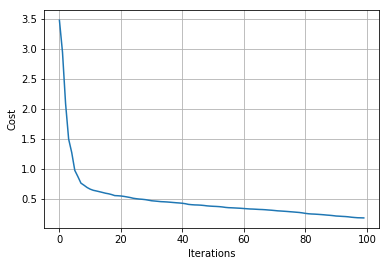

In [13]:
#Plot cost during training:
plot.plot(T.J)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.show()

In [14]:
#Training Data:
trainX = np.array(([	0.570422535	,	0.112113419	,	0.423360552	,	0.311558554	,	0.422995385	]	,
[	0.669014085	,	0.170734062	,	0.311558554	,	0.422995385	,	0.424780646	]	,
[	0.697183099	,	0.223256598	,	0.422995385	,	0.424780646	,	0.322057108	]	,
[	0.971830986	,	0.241974687	,	0.424780646	,	0.322057108	,	0.460465588	]	,
[	0.591549296	,	0.365733465	,	0.322057108	,	0.460465588	,	0.166688644	]	,
[	0.281690141	,	0.552558994	,	0.460465588	,	0.166688644	,	0.401744687	]	,
[	0.26056338	,	0.370023519	,	0.166688644	,	0.401744687	,	0.316478166	]	,
[	0.464788732	,	0.332531703	,	0.401744687	,	0.316478166	,	0.270862707	]	,
[	0.992957746	,	0.387887522	,	0.316478166	,	0.270862707	,	0.312512045	]	,
[	0.676056338	,	0.398363943	,	0.270862707	,	0.312512045	,	0.369092661	]	,
[	0.253521127	,	0.284826299	,	0.312512045	,	0.369092661	,	0.205751382	]	,
[	0.450704225	,	0.186735022	,	0.369092661	,	0.205751382	,	0.176193133	]	,
[	0	,	0.182694768	,	0.205751382	,	0.176193133	,	0.290419435	]	,
[	0.485915493	,	0.255617002	,	0.176193133	,	0.290419435	,	0.24090886	]	,
[	0.781690141	,	0.23597043	,	0.290419435	,	0.24090886	,	0.27408835	]	,
[	0.802816901	,	0.164134134	,	0.24090886	,	0.27408835	,	0.370908353	]	,
[	0.302816901	,	0.178176635	,	0.27408835	,	0.370908353	,	0.05869047	]	,
[	0.471830986	,	0.163956101	,	0.370908353	,	0.05869047	,	0.400324593	]	,
[	0.415492958	,	0.133241484	,	0.05869047	,	0.400324593	,	0.289993407	]	,
[	0.647887324	,	0.226399017	,	0.400324593	,	0.289993407	,	0.307714155	]	,
[	0.612676056	,	0.255013861	,	0.289993407	,	0.307714155	,	0.429152508	]	,
[	1	,	0.23708614	,	0.307714155	,	0.429152508	,	0.440624842	]	,
[	0.478873239	,	0.231651119	,	0.429152508	,	0.440624842	,	0.358046356	]	,
[	0.302816901	,	0.233067608	,	0.440624842	,	0.358046356	,	0.295724502	]	,
[	0.38028169	,	0.221173719	,	0.358046356	,	0.295724502	,	0.491413501	]	,
[	0.591549296	,	0.22633168	,	0.295724502	,	0.491413501	,	0.356240807	]	,
[	0.802816901	,	0.218698642	,	0.491413501	,	0.356240807	,	0.541055942	]	,
[	0.471830986	,	0.232032203	,	0.356240807	,	0.541055942	,	0.157529036	]	,
[	0.267605634	,	0.231947948	,	0.541055942	,	0.157529036	,	0.55294416	]	,
[	0.408450704	,	0.221547817	,	0.157529036	,	0.55294416	,	0.514337881	]	,
[	0.323943662	,	0.287958581	,	0.55294416	,	0.514337881	,	0.441213166	]	,
[	0.457746479	,	0.28837327	,	0.514337881	,	0.441213166	,	0.58940001	]	,
[	0.816901408	,	0.297145757	,	0.441213166	,	0.58940001	,	0.677070548	]	,
[	0.753521127	,	0.243669818	,	0.58940001	,	0.677070548	,	0.67615763	]	,
[	0.436619718	,	0.307437314	,	0.677070548	,	0.67615763	,	0.696941725	]	,
[	0.457746479	,	0.358597855	,	0.67615763	,	0.696941725	,	0.582938581	]	,
[	0.387323944	,	0.372181217	,	0.696941725	,	0.582938581	,	0.611147741	]	,
[	0.464788732	,	0.450259481	,	0.582938581	,	0.611147741	,	0.783455901	]	,
[	0.732394366	,	0.443095634	,	0.611147741	,	0.783455901	,	0.935669727	]	,
[	0.514084507	,	0.558155976	,	0.783455901	,	0.935669727	,	0.286990922	]	,
[	0.281690141	,	0.602359827	,	0.935669727	,	0.286990922	,	1	]	,
[	0.190140845	,	0.696291723	,	0.286990922	,	1	,	0.849977177	]	,
[	0.514084507	,	0.790604671	,	1	,	0.849977177	,	0.626008013	]	,
[	0.507042254	,	0.644022227	,	0.849977177	,	0.626008013	,	0.936146473	]	,
[	0.753521127	,	0.583228643	,	0.626008013	,	0.936146473	,	0.858467312	]	,
[	0.542253521	,	0.481715009	,	0.936146473	,	0.858467312	,	0.702581529	]	,

)
, dtype=float)
trainY = np.array(([	0.424780646	]	,
[	0.322057108	]	,
[	0.460465588	]	,
[	0.166688644	]	,
[	0.401744687	]	,
[	0.316478166	]	,
[	0.270862707	]	,
[	0.312512045	]	,
[	0.369092661	]	,
[	0.205751382	]	,
[	0.176193133	]	,
[	0.290419435	]	,
[	0.24090886	]	,
[	0.27408835	]	,
[	0.370908353	]	,
[	0.05869047	]	,
[	0.400324593	]	,
[	0.289993407	]	,
[	0.307714155	]	,
[	0.429152508	]	,
[	0.440624842	]	,
[	0.358046356	]	,
[	0.295724502	]	,
[	0.491413501	]	,
[	0.356240807	]	,
[	0.541055942	]	,
[	0.157529036	]	,
[	0.55294416	]	,
[	0.514337881	]	,
[	0.441213166	]	,
[	0.58940001	]	,
[	0.677070548	]	,
[	0.67615763	]	,
[	0.696941725	]	,
[	0.582938581	]	,
[	0.611147741	]	,
[	0.783455901	]	,
[	0.935669727	]	,
[	0.286990922	]	,
[	1	]	,
[	0.849977177	]	,
[	0.626008013	]	,
[	0.936146473	]	,
[	0.858467312	]	,
[	0.702581529	]	,
[	0.664685297	]	,

)
, dtype=float)

#Testing Data:
testX = np.array(([	0.26056338	,	0.442812107	,	0.858467312	,	0.702581529	,	0.664685297	]	,
[	0.394366197	,	0.496270585	,	0.702581529	,	0.664685297	,	0.384176092	]	,
[	0.626760563	,	0.475463393	,	0.664685297	,	0.384176092	,	0.50844449	]	,
[	0.795774648	,	0.551559791	,	0.384176092	,	0.50844449	,	0.706050616	]	,
[	0.704225352	,	0.500994351	,	0.50844449	,	0.706050616	,	0.625663133	]	,
[	0.535211268	,	0.445458587	,	0.706050616	,	0.625663133	,	0.310067454	]	,
[	0.401408451	,	0.505711667	,	0.625663133	,	0.310067454	,	0.718151849	]	,
[	0.126760563	,	0.465889036	,	0.310067454	,	0.718151849	,	0.581295329	]	,
[	0.330985915	,	0.46785659	,	0.718151849	,	0.581295329	,	0.590840392	]	,
[	0.415492958	,	0.453001423	,	0.581295329	,	0.590840392	,	0.641121875	]	,
[	0.556338028	,	0.437411724	,	0.590840392	,	0.641121875	,	0.700096364	]	,
[	0.591549296	,	0.350673696	,	0.641121875	,	0.700096364	,	0.614971852	]	,
[	0.514084507	,	0.364031312	,	0.700096364	,	0.614971852	,	0.591377999	]	,

)
, dtype=float)
testY = np.array(([	0.384176092	]	,
[	0.50844449	]	,
[	0.706050616	]	,
[	0.625663133	]	,
[	0.310067454	]	,
[	0.718151849	]	,
[	0.581295329	]	,
[	0.590840392	]	,
[	0.641121875	]	,
[	0.700096364	]	,
[	0.614971852	]	,
[	0.591377999	]	,
[	0.32	]	,

)
, dtype=float)


dataprediksi = np.array(([	0.387323944	,	0.795380412	,	0.614971852	,	0.591377999	,	0.32	]	,
[	0.373239437	,	1	,	0.591377999	,	0.32	,	0.50	]	,
[	0.366197183	,	0.707681705	,	0.32	,	0.50	,	0.415539889	]	,
[	0.443661972	,	0.491695324	,	0.50	,	0.415539889	,	0	]	,

), dtype=float)

In [15]:
testX

array([[0.26056338, 0.44281211, 0.85846731, 0.70258153, 0.6646853 ],
       [0.3943662 , 0.49627058, 0.70258153, 0.6646853 , 0.38417609],
       [0.62676056, 0.47546339, 0.6646853 , 0.38417609, 0.50844449],
       [0.79577465, 0.55155979, 0.38417609, 0.50844449, 0.70605062],
       [0.70422535, 0.50099435, 0.50844449, 0.70605062, 0.62566313],
       [0.53521127, 0.44545859, 0.70605062, 0.62566313, 0.31006745],
       [0.40140845, 0.50571167, 0.62566313, 0.31006745, 0.71815185],
       [0.12676056, 0.46588904, 0.31006745, 0.71815185, 0.58129533],
       [0.33098592, 0.46785659, 0.71815185, 0.58129533, 0.59084039],
       [0.41549296, 0.45300142, 0.58129533, 0.59084039, 0.64112187],
       [0.55633803, 0.43741172, 0.59084039, 0.64112187, 0.70009636],
       [0.5915493 , 0.3506737 , 0.64112187, 0.70009636, 0.61497185],
       [0.51408451, 0.36403131, 0.70009636, 0.61497185, 0.591378  ]])

In [16]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [17]:
#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

         Current function value: 0.163212
         Iterations: 100
         Function evaluations: 111
         Gradient evaluations: 111


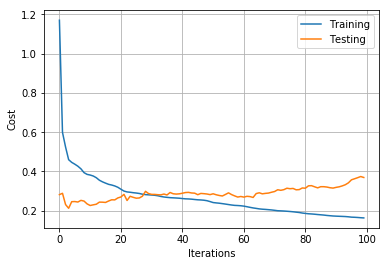

In [18]:
#Plot cost during training:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [19]:
T.J

[array([1.17020415]),
 array([0.59886942]),
 array([0.52429368]),
 array([0.45983265]),
 array([0.44615607]),
 array([0.43696015]),
 array([0.42664314]),
 array([0.41322592]),
 array([0.39388254]),
 array([0.38499593]),
 array([0.38171611]),
 array([0.37671071]),
 array([0.36799973]),
 array([0.35522252]),
 array([0.34700304]),
 array([0.34042045]),
 array([0.33424878]),
 array([0.33074988]),
 array([0.32605468]),
 array([0.31935233]),
 array([0.30939849]),
 array([0.30003759]),
 array([0.29562786]),
 array([0.29391973]),
 array([0.29168524]),
 array([0.29000204]),
 array([0.28767233]),
 array([0.28396383]),
 array([0.28182424]),
 array([0.28082316]),
 array([0.27976603]),
 array([0.27848853]),
 array([0.27612886]),
 array([0.27250088]),
 array([0.26978825]),
 array([0.26796326]),
 array([0.26641677]),
 array([0.2655528]),
 array([0.26466517]),
 array([0.26356239]),
 array([0.26181888]),
 array([0.26042922]),
 array([0.25980634]),
 array([0.25871808]),
 array([0.25700759]),
 array([0.2

In [20]:
T.testJ

[array([0.28190342]),
 array([0.28860675]),
 array([0.23128381]),
 array([0.21231553]),
 array([0.24591804]),
 array([0.24657228]),
 array([0.24420114]),
 array([0.2525554]),
 array([0.24902088]),
 array([0.23470384]),
 array([0.22645776]),
 array([0.22987214]),
 array([0.23292492]),
 array([0.24362572]),
 array([0.24334902]),
 array([0.24202794]),
 array([0.24936279]),
 array([0.25556442]),
 array([0.2549898]),
 array([0.26499349]),
 array([0.26984029]),
 array([0.2833185]),
 array([0.25192955]),
 array([0.2733057]),
 array([0.26810816]),
 array([0.26369227]),
 array([0.26489857]),
 array([0.2737931]),
 array([0.29867668]),
 array([0.28729215]),
 array([0.28310251]),
 array([0.28291773]),
 array([0.28147752]),
 array([0.28068246]),
 array([0.28476124]),
 array([0.28013252]),
 array([0.29284551]),
 array([0.28623568]),
 array([0.28465312]),
 array([0.28582988]),
 array([0.28900092]),
 array([0.29245815]),
 array([0.29336755]),
 array([0.29023276]),
 array([0.28927401]),
 array([0.28154

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.09978786274344734

In [22]:
yHat = NN.forward(X)

In [23]:
yHat

array([[0.27812909],
       [0.45641756],
       [0.45232247],
       [0.18518352],
       [0.42531783],
       [0.29922789],
       [0.30762281],
       [0.3062453 ],
       [0.37484503],
       [0.23059972],
       [0.25044715],
       [0.40017794],
       [0.2099278 ],
       [0.20278685],
       [0.32146436],
       [0.16635853],
       [0.31106399],
       [0.27396517],
       [0.29723096],
       [0.32382008],
       [0.32067312],
       [0.32021088],
       [0.51449068],
       [0.43772377],
       [0.51644592],
       [0.55087805],
       [0.23929364],
       [0.57713453],
       [0.5816307 ],
       [0.40608597],
       [0.63053115],
       [0.59300358],
       [0.60508245],
       [0.58406094],
       [0.55926963],
       [0.68357718],
       [0.71099892],
       [0.7195568 ],
       [0.40970412],
       [0.87862821],
       [0.82524811],
       [0.63874801],
       [0.91848861],
       [0.88587981],
       [0.68579798],
       [0.73477814],
       [0.8025917 ],
       [0.752

In [24]:
y

array([[0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.6646853 ],
       [0.38417609],
       [0.508

In [25]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.018047393065311793

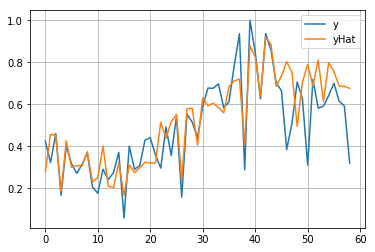

In [26]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [27]:
#Regularization Parameter:
Lambda = 0.0001

In [28]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.tanhPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.tanhPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [29]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 5
        self.outputLayerSize = 1
        self.hiddenLayerSize = 8
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.tanh(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.tanh(self.z3) 
        return yHat
        
    def tanh(self, z):
        # activation function
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z): 
        #derivative of tanh
        return 1-((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))**2
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.tanhPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.tanhPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [30]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [31]:
NN = Neural_Network(Lambda=0.0001)

In [32]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [33]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

6.040425286919452e-10

In [34]:
T = trainer(NN)

In [35]:
T.train(X,y,testX,testY)

         Current function value: 0.010392
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104


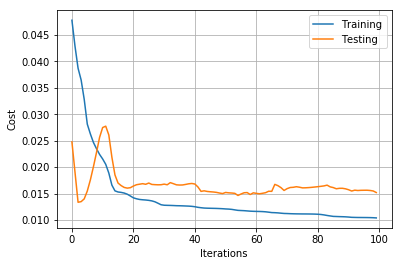

In [36]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [37]:
T.J

[array([0.04776489]),
 array([0.04286625]),
 array([0.03869159]),
 array([0.03646244]),
 array([0.03281265]),
 array([0.02812205]),
 array([0.02627489]),
 array([0.0246559]),
 array([0.02347351]),
 array([0.02239349]),
 array([0.02153811]),
 array([0.02052181]),
 array([0.01887527]),
 array([0.01659004]),
 array([0.01550869]),
 array([0.01529435]),
 array([0.01521828]),
 array([0.01509187]),
 array([0.01487871]),
 array([0.01454325]),
 array([0.01418872]),
 array([0.01400859]),
 array([0.01388253]),
 array([0.01382176]),
 array([0.01377706]),
 array([0.01371179]),
 array([0.01360992]),
 array([0.01343948]),
 array([0.01316691]),
 array([0.01288109]),
 array([0.01278997]),
 array([0.01276936]),
 array([0.01275501]),
 array([0.01273205]),
 array([0.01270257]),
 array([0.01269044]),
 array([0.01267149]),
 array([0.01264653]),
 array([0.01262233]),
 array([0.01258044]),
 array([0.0125071]),
 array([0.01239358]),
 array([0.01231775]),
 array([0.01225686]),
 array([0.01223035]),
 array([0.01

In [38]:
T.testJ

[array([0.02476583]),
 array([0.01903763]),
 array([0.01334977]),
 array([0.01347202]),
 array([0.01399043]),
 array([0.0154759]),
 array([0.01757592]),
 array([0.02007582]),
 array([0.02277459]),
 array([0.02562684]),
 array([0.02748166]),
 array([0.02773491]),
 array([0.02607262]),
 array([0.0218759]),
 array([0.01851913]),
 array([0.01698431]),
 array([0.01650513]),
 array([0.01615609]),
 array([0.01602408]),
 array([0.01610338]),
 array([0.01641794]),
 array([0.01666602]),
 array([0.01676724]),
 array([0.01686368]),
 array([0.01675124]),
 array([0.0169836]),
 array([0.01672005]),
 array([0.01667937]),
 array([0.01665263]),
 array([0.01666603]),
 array([0.01677999]),
 array([0.01665778]),
 array([0.017064]),
 array([0.01686495]),
 array([0.0166479]),
 array([0.01660766]),
 array([0.01662299]),
 array([0.01672607]),
 array([0.01684266]),
 array([0.01690203]),
 array([0.01679941]),
 array([0.01623677]),
 array([0.01540979]),
 array([0.0155147]),
 array([0.01539746]),
 array([0.0153371

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.005114009012264415

In [40]:
yHat=NN.forward(X)

In [41]:
yHat

array([[0.42035119],
       [0.37492527],
       [0.41127474],
       [0.32800627],
       [0.39500061],
       [0.39667456],
       [0.30334916],
       [0.39686206],
       [0.29759278],
       [0.34682966],
       [0.35262042],
       [0.31932599],
       [0.21430796],
       [0.25437806],
       [0.27334995],
       [0.27265194],
       [0.33276608],
       [0.297203  ],
       [0.28016193],
       [0.36620167],
       [0.34363497],
       [0.30503444],
       [0.46718321],
       [0.45147066],
       [0.41055203],
       [0.4008162 ],
       [0.40218029],
       [0.44587942],
       [0.46516651],
       [0.39928398],
       [0.56970272],
       [0.52923094],
       [0.44215972],
       [0.51539612],
       [0.64741248],
       [0.65253607],
       [0.65108719],
       [0.63157178],
       [0.59859151],
       [0.7390044 ],
       [0.73710438],
       [0.66724952],
       [0.83030814],
       [0.76101913],
       [0.67035092],
       [0.75816655],
       [0.7312717 ],
       [0.670

In [42]:
y

array([[0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.6646853 ],
       [0.38417609],
       [0.508

In [43]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.01892794242422806

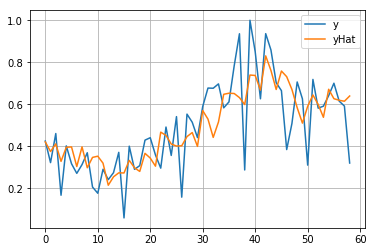

In [44]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [45]:
prediksi=NN.forward(dataprediksi)

In [46]:
prediksi

array([[0.68341097],
       [0.69484652],
       [0.54336943],
       [0.44627408]])

In [47]:
from sklearn.metrics import mean_squared_error 

In [48]:
Y_true= ([	0.50	]	,
[	0.415539889	]	,
[	0	]	,
[	0.235502358	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.1128317083950296

In [49]:
dataprediksi

array([[0.38732394, 0.79538041, 0.61497185, 0.591378  , 0.32      ],
       [0.37323944, 1.        , 0.591378  , 0.32      , 0.5       ],
       [0.36619718, 0.70768171, 0.32      , 0.5       , 0.41553989],
       [0.44366197, 0.49169532, 0.5       , 0.41553989, 0.        ]])

In [50]:
z=np.array([0.6294	,	0.4578])

In [51]:
y=np.array([0.415539889	,	0	,	0.235502358	])

In [52]:
a=np.concatenate((z,y))

In [53]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.25636366])

In [54]:
#prediksi 2
c=prediksi
z1=np.array([0.6795	,	0.4539])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

array([0.16945075])

In [55]:
#prediksi 3
c=prediksi
z2=np.array([0.5888	,	0.4545])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

array([0.13015404])

In [56]:
#prediksi 4
c=prediksi
z3=np.array([0.527	,	0.4555])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

array([0.10407806])

In [57]:
#prediksi 5
c=prediksi
z4=np.array([0.4745	,	0.4564])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

array([0.08120982])

In [58]:
#prediksi 6
c=prediksi
z5=np.array([0.4621	,	0.4571])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi

array([0.06840777])